<a href="https://colab.research.google.com/github/dswh/lil_nlp_with_tensorflow/blob/main/04_03_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.8.0


#Downloading the data and making it ready 

In [2]:
##download data from this url
!wget --no-check-certificate \
    https://raw.githubusercontent.com/dswh/lil_nlp_with_tensorflow/main/sonnets.txt \
    -O /tmp/sonnet.txt

--2022-04-23 20:54:00--  https://raw.githubusercontent.com/dswh/lil_nlp_with_tensorflow/main/sonnets.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29658 (29K) [text/plain]
Saving to: ‘/tmp/sonnet.txt’

/tmp/sonnet.txt     100%[===================>]  28.96K  --.-KB/s    in 0s      

2022-04-23 20:54:00 (85.4 MB/s) - ‘/tmp/sonnet.txt’ saved [29658/29658]



In [29]:
# opening the sonnet.txt file 
text = open('/tmp/sonnet.txt').read()
print(len(text))



28893


In [5]:
#now making the sonnets lower case to remove discrepancy of uppercase characters and splitting them in lines
corpus = text.lower().split("\n")
print(corpus)

['i', '', ' from fairest creatures we desire increase,', " that thereby beauty's rose might never die,", ' but as the riper should by time decease,', ' his tender heir might bear his memory:', ' but thou, contracted to thine own bright eyes,', " feed'st thy light's flame with self-substantial fuel,", ' making a famine where abundance lies,', ' thy self thy foe, to thy sweet self too cruel:', " thou that art now the world's fresh ornament,", ' and only herald to the gaudy spring,', ' within thine own bud buriest thy content,', " and tender churl mak'st waste in niggarding:", '   pity the world, or else this glutton be,', "   to eat the world's due, by the grave and thee.", '', ' ii', '', ' when forty winters shall besiege thy brow,', " and dig deep trenches in thy beauty's field,", " thy youth's proud livery so gazed on now,", " will be a tatter'd weed of small worth held:", ' then being asked, where all thy beauty lies,', ' where all the treasure of thy lusty days;', ' to say, within t

## Setting up the tokenizer, splitting into labels and input text for n-gram 

In [6]:
#instantiating the tokenizer class and fitting on corpus
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus))

#getting vocab size and adding +1 for <oov> token
vocab_size = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(vocab_size)

None
{'and': 1, 'the': 2, 'to': 3, 'thou': 4, 'in': 5, 'my': 6, 'of': 7, 'i': 8, 'thy': 9, 'that': 10, 'with': 11, 'thee': 12, 'for': 13, 'but': 14, 'not': 15, 'a': 16, 'love': 17, 'be': 18, 'all': 19, 'me': 20, 'when': 21, 'so': 22, 'by': 23, 'then': 24, 'is': 25, 'which': 26, 'as': 27, 'this': 28, 'from': 29, 'his': 30, 'self': 31, 'do': 32, 'thine': 33, 'it': 34, 'on': 35, 'art': 36, 'if': 37, 'eyes': 38, 'more': 39, 'or': 40, 'beauty': 41, 'mine': 42, 'doth': 43, 'you': 44, 'your': 45, 'time': 46, 'sweet': 47, 'make': 48, 'one': 49, 'where': 50, 'their': 51, 'fair': 52, 'her': 53, 'are': 54, 'yet': 55, 'day': 56, 'what': 57, 'see': 58, 'who': 59, 'than': 60, 'can': 61, 'should': 62, 'own': 63, 'shall': 64, 'how': 65, 'no': 66, 'hath': 67, 'will': 68, 'were': 69, 'live': 70, 'those': 71, 'him': 72, 'let': 73, 'may': 74, 'o': 75, 'night': 76, "love's": 77, 'now': 78, 'world': 79, 'she': 80, 'nor': 81, 'they': 82, "beauty's": 83, 'dost': 84, 'he': 85, 'give': 86, 'eye': 87, 'still': 8

In [19]:
#now we are creating n gram sequence, lets say padding=post and i=1, love=9, pizza=7, we berak the texts like factorial 
#for ex: ngram seq for  'i love pizza much' will be [1] and then [1,9] and then [1,9,7], and so on.  We treat the last element as label rather than input so that we can predict one word one by one
# so if we get 'i love' then we try to teach our model to predict 'pizza' and then next time we feed 'i love pizza' and train it to teach get the word 'much' and so on

#input sequence will store all the ngram sequences
input_sequences = []

#we are going line by line, creating texts to sequences first [0th,1st index], then [0th,1st,2nd index and so on]
for line in corpus:
    tokens = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokens)):
        #appending one word turn by turn
        n_gram_seq = tokens[:i+1]
        input_sequences.append(n_gram_seq)


In [21]:
#finding the longest sequence length fot ex: one has[1,19,222] and other line has [1,3,6,7,9,111] so we need to find max length of longest sequence, so that we can get idea for padding
max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(input_sequences,
                                         maxlen=max_seq_len,
                                         padding='pre')
                        )


In [23]:
#now since we got our corpus into sequenecs of n gram, we need to extract the last element of each gram sequence as a label for classification
input_corpus = input_seq_array[:, :-1]   #goes from 0th to second last element
labels = input_seq_array[:,-1]

#one-hot encoding the labels as it is actually just a classification problem
labels = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

## Define the LSTM model

In [28]:
model = tf.keras.Sequential([
                tf.keras.layers.Embedding(vocab_size, 120, input_length=max_seq_len-1),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(120,return_sequences=True)), 
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(30)),
                tf.keras.layers.Dense(vocab_size, activation='softmax')  #since we have the classes as same as vocab size, because we are treating each last label as prediction
])

#setting learning rate
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

#since we have categorical data, we use categorical cross entropy
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(input_corpus, labels, epochs=300, verbose=1)

Epoch 1/300
142/142 [==============================] - 7s 12ms/step - loss: 6.7220 - accuracy: 0.0197
Epoch 2/300
142/142 [==============================] - 2s 12ms/step - loss: 6.3073 - accuracy: 0.0205
Epoch 3/300
142/142 [==============================] - 1s 10ms/step - loss: 6.1615 - accuracy: 0.0181
Epoch 4/300
142/142 [==============================] - 2s 12ms/step - loss: 6.0486 - accuracy: 0.0239
Epoch 5/300
142/142 [==============================] - 1s 10ms/step - loss: 5.9593 - accuracy: 0.0340
Epoch 6/300
142/142 [==============================] - 2s 11ms/step - loss: 5.8849 - accuracy: 0.0387
Epoch 7/300
142/142 [==============================] - 1s 10ms/step - loss: 5.7992 - accuracy: 0.0435
Epoch 8/300
142/142 [==============================] - 2s 11ms/step - loss: 5.7235 - accuracy: 0.0519
Epoch 9/300
142/142 [==============================] - 1s 10ms/step - loss: 5.6272 - accuracy: 0.0557
Epoch 10/300
142/142 [==============================] - 1s 10ms/step - loss: 5.514

## Visualise the metrics

In [31]:
import matplotlib.pyplot as plt

def plot_metric(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

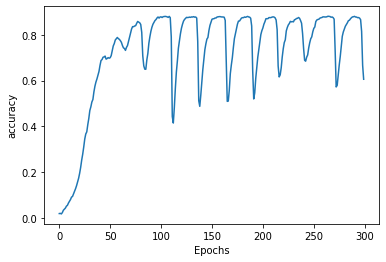

In [32]:
plot_metric(history, 'accuracy')

## Generate new text

In [36]:
start_text = "It was cold "
next_words = 10
  
#same process as we convert our text to sequences and specify the next words to predict, we loop over number of times we specify in next_word	
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([start_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
	predicted=np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():   #we check if the word exists in our trained word index dictionary
		if index == predicted:
			output_word = word
			break
	start_text += " " + output_word
print(start_text)

It was cold  i may bright not brief still hope the loss have
